# Diabetes Prediction Using Machine Learning

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Loading the Dataset and doing some EDA

In [2]:
# Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

# Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#  Getting info about the fataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Getting description of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> **DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

> Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [5]:
# Getting the info of dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


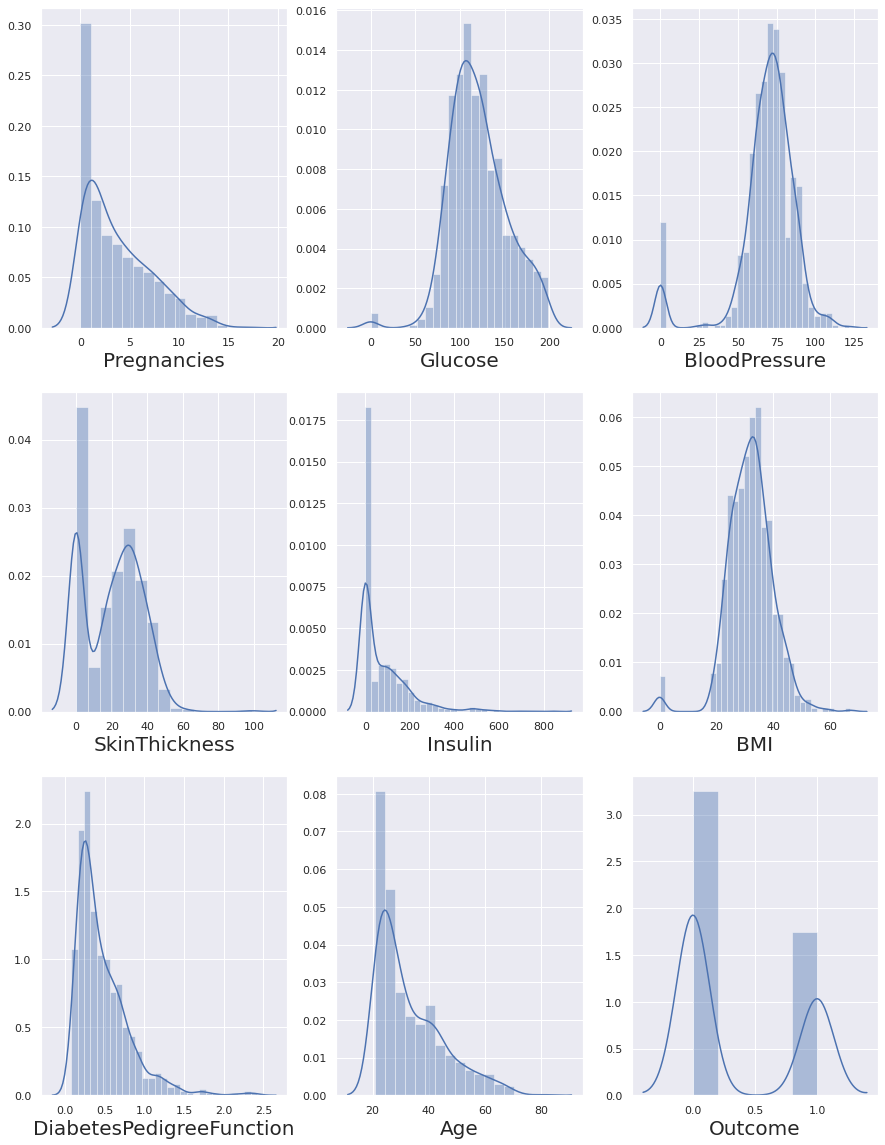

In [6]:
# let's see how data is distributed for every column by drawing Distribution plots

plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in diabetes_data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

####  We  can  see  there  is  some  skewness  in  the  data,  let's  deal  with  data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [7]:
# Replacing zero values with the mean of the column

diabetes_data['BMI'] = diabetes_data['BMI'].replace(0, diabetes_data['BMI'].mean())
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0, diabetes_data['BloodPressure'].mean())
diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0, diabetes_data['Glucose'].mean())
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0, diabetes_data['Insulin'].mean())
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0, diabetes_data['SkinThickness'].mean())

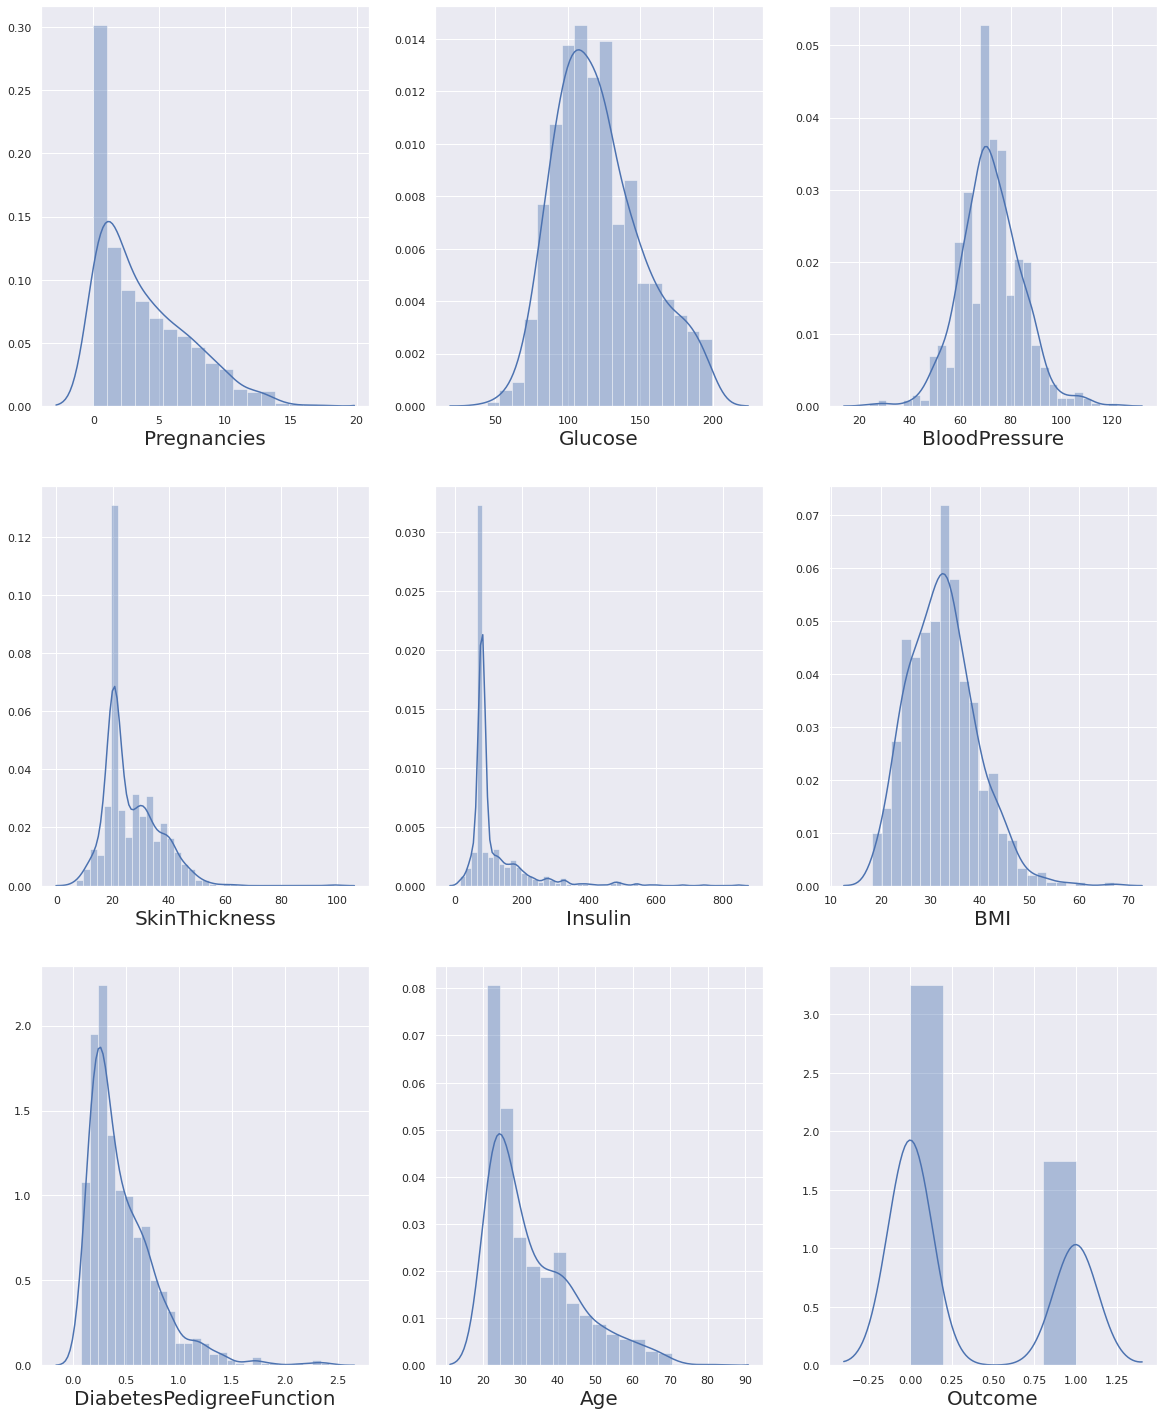

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diabetes_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

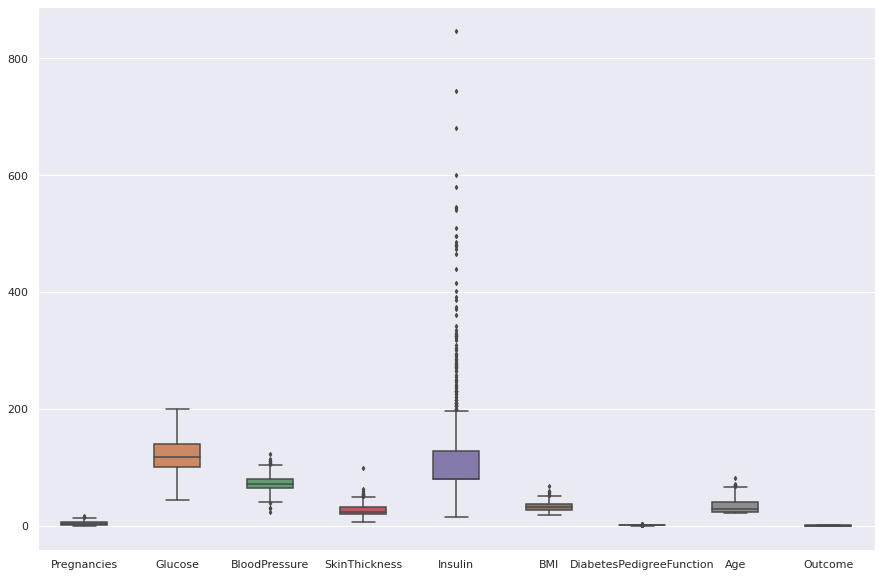

In [9]:
#  Drawing Boxplots for looking outliers

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = diabetes_data, width= 0.5,ax=ax,  fliersize=3)


In [10]:
#  Treatment of outliers by removing some sort of data from each columns
q = diabetes_data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = diabetes_data[diabetes_data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

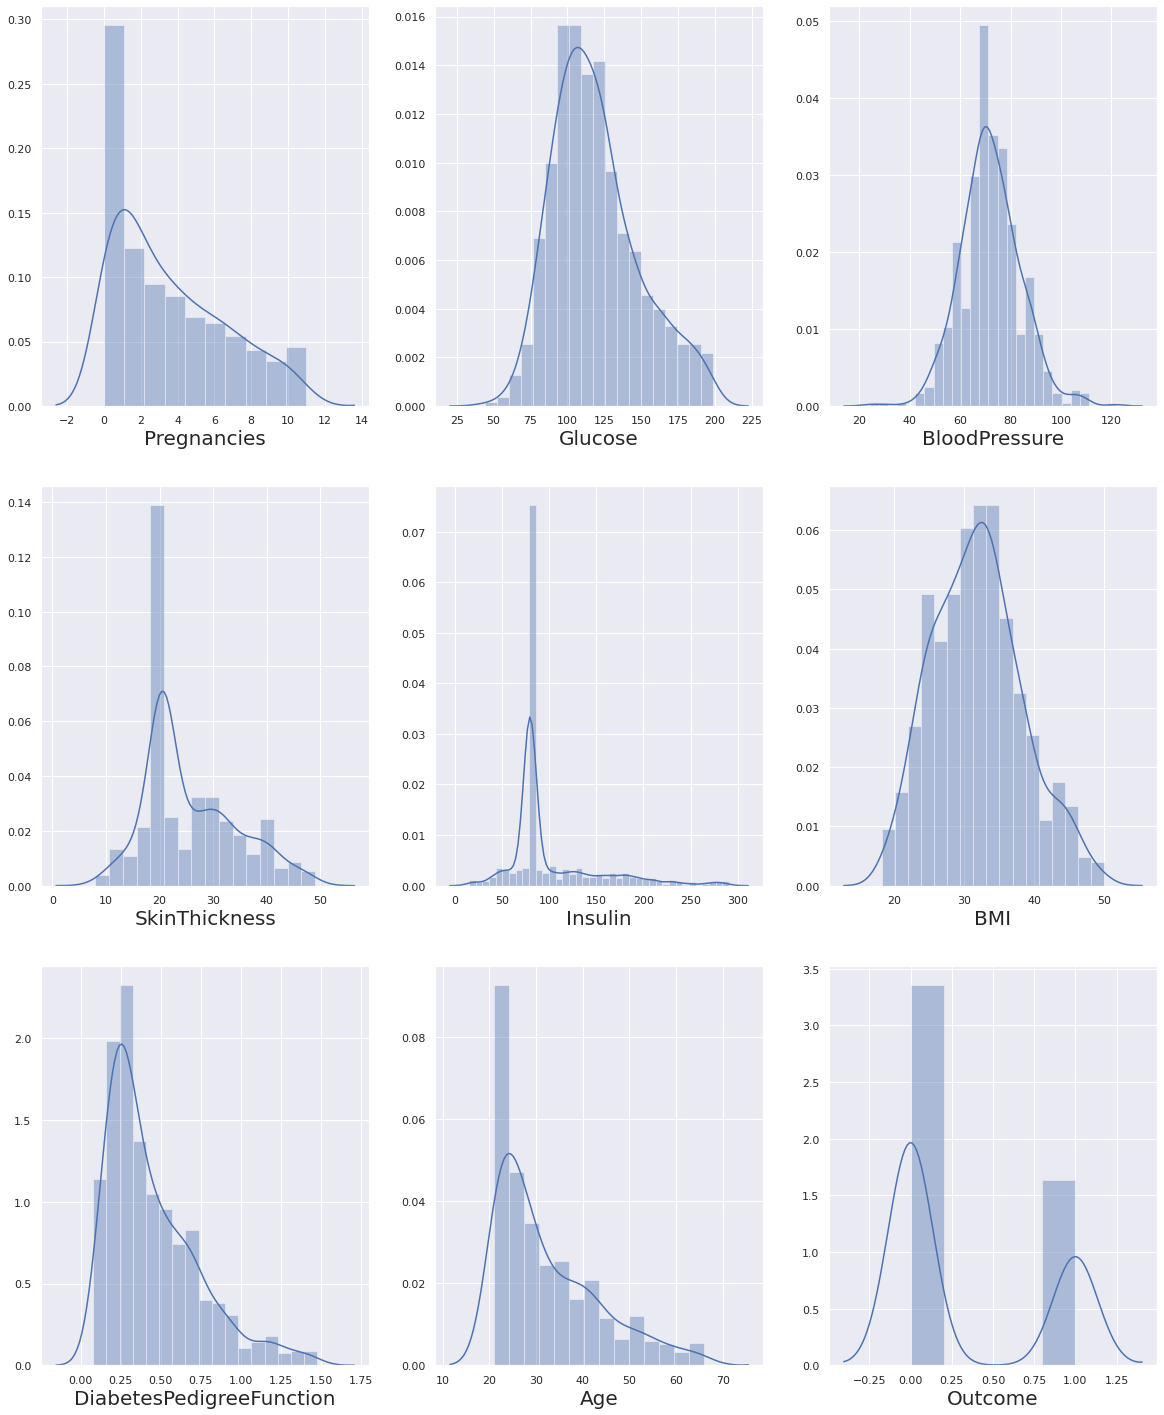

In [11]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

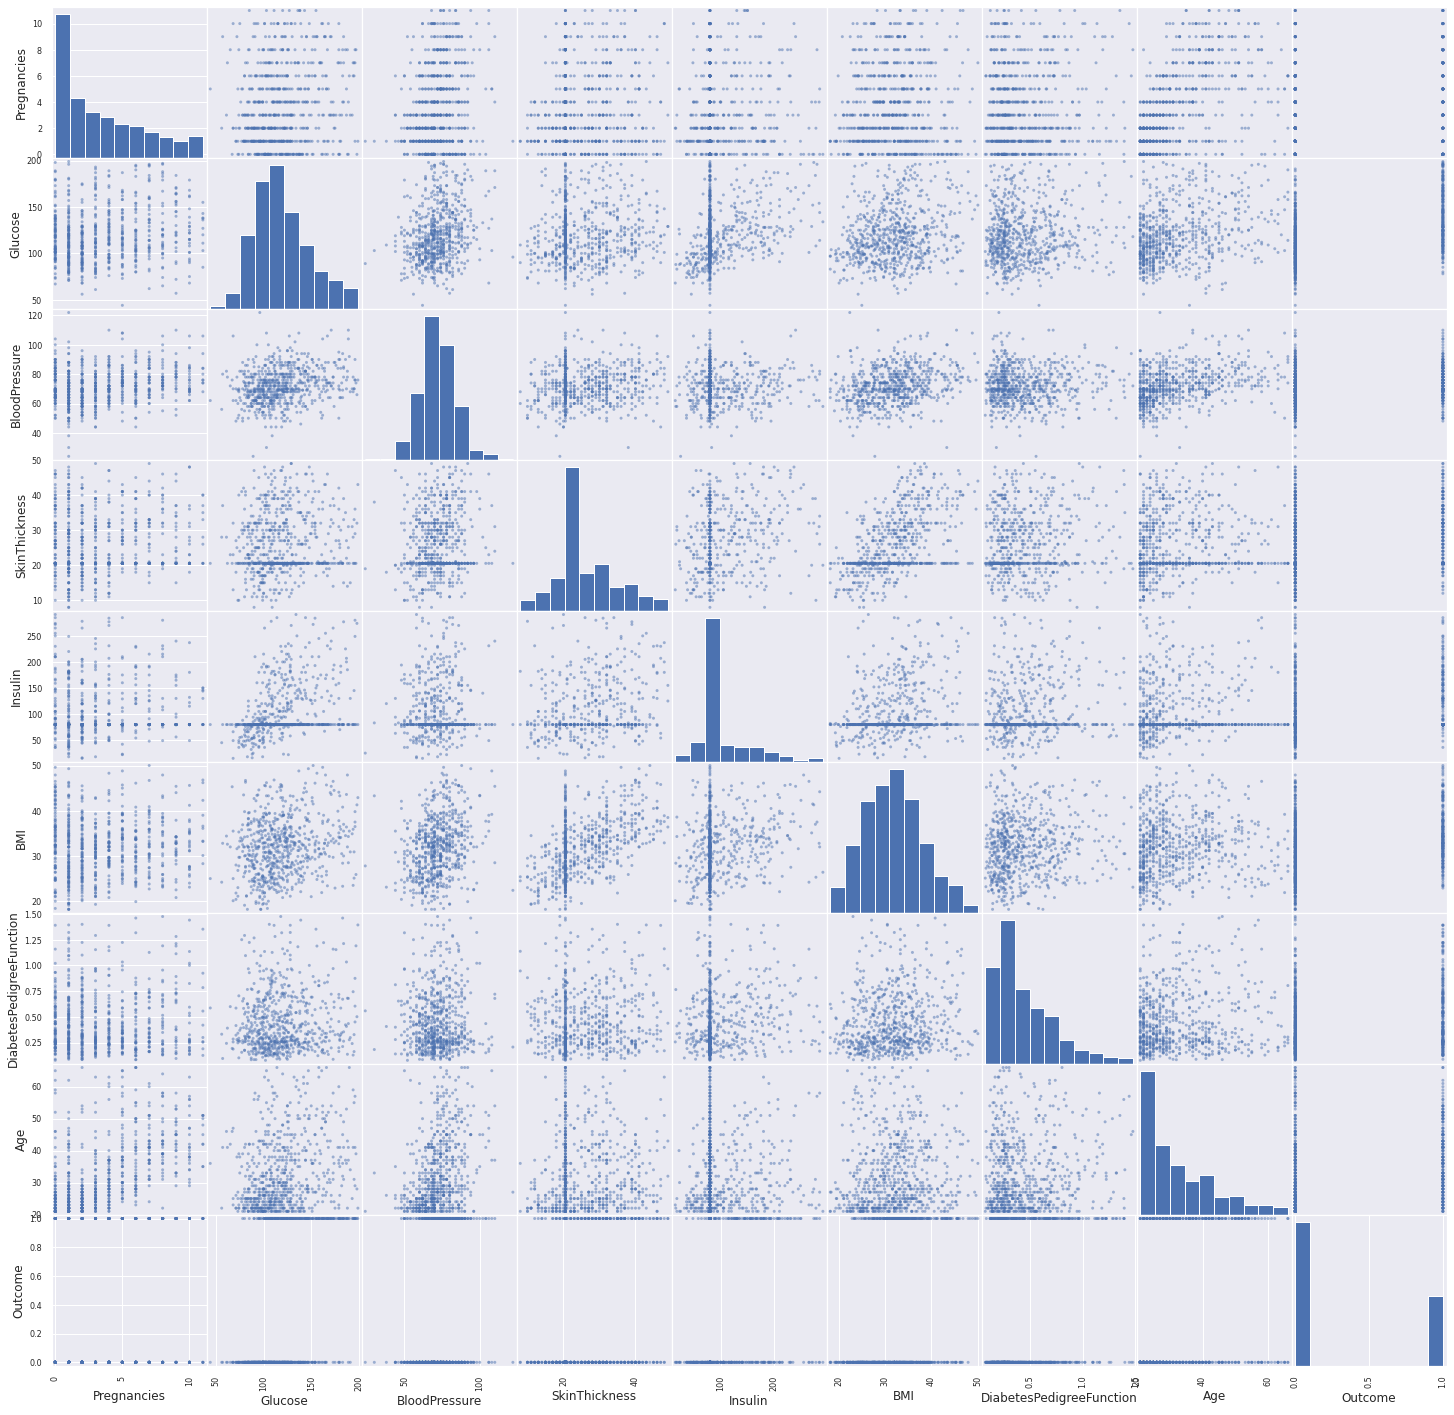

In [12]:
#  Scatter matrix of uncleaned data
from pandas.plotting import scatter_matrix

p = scatter_matrix(data_cleaned,figsize=(25, 25))

###### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.


###

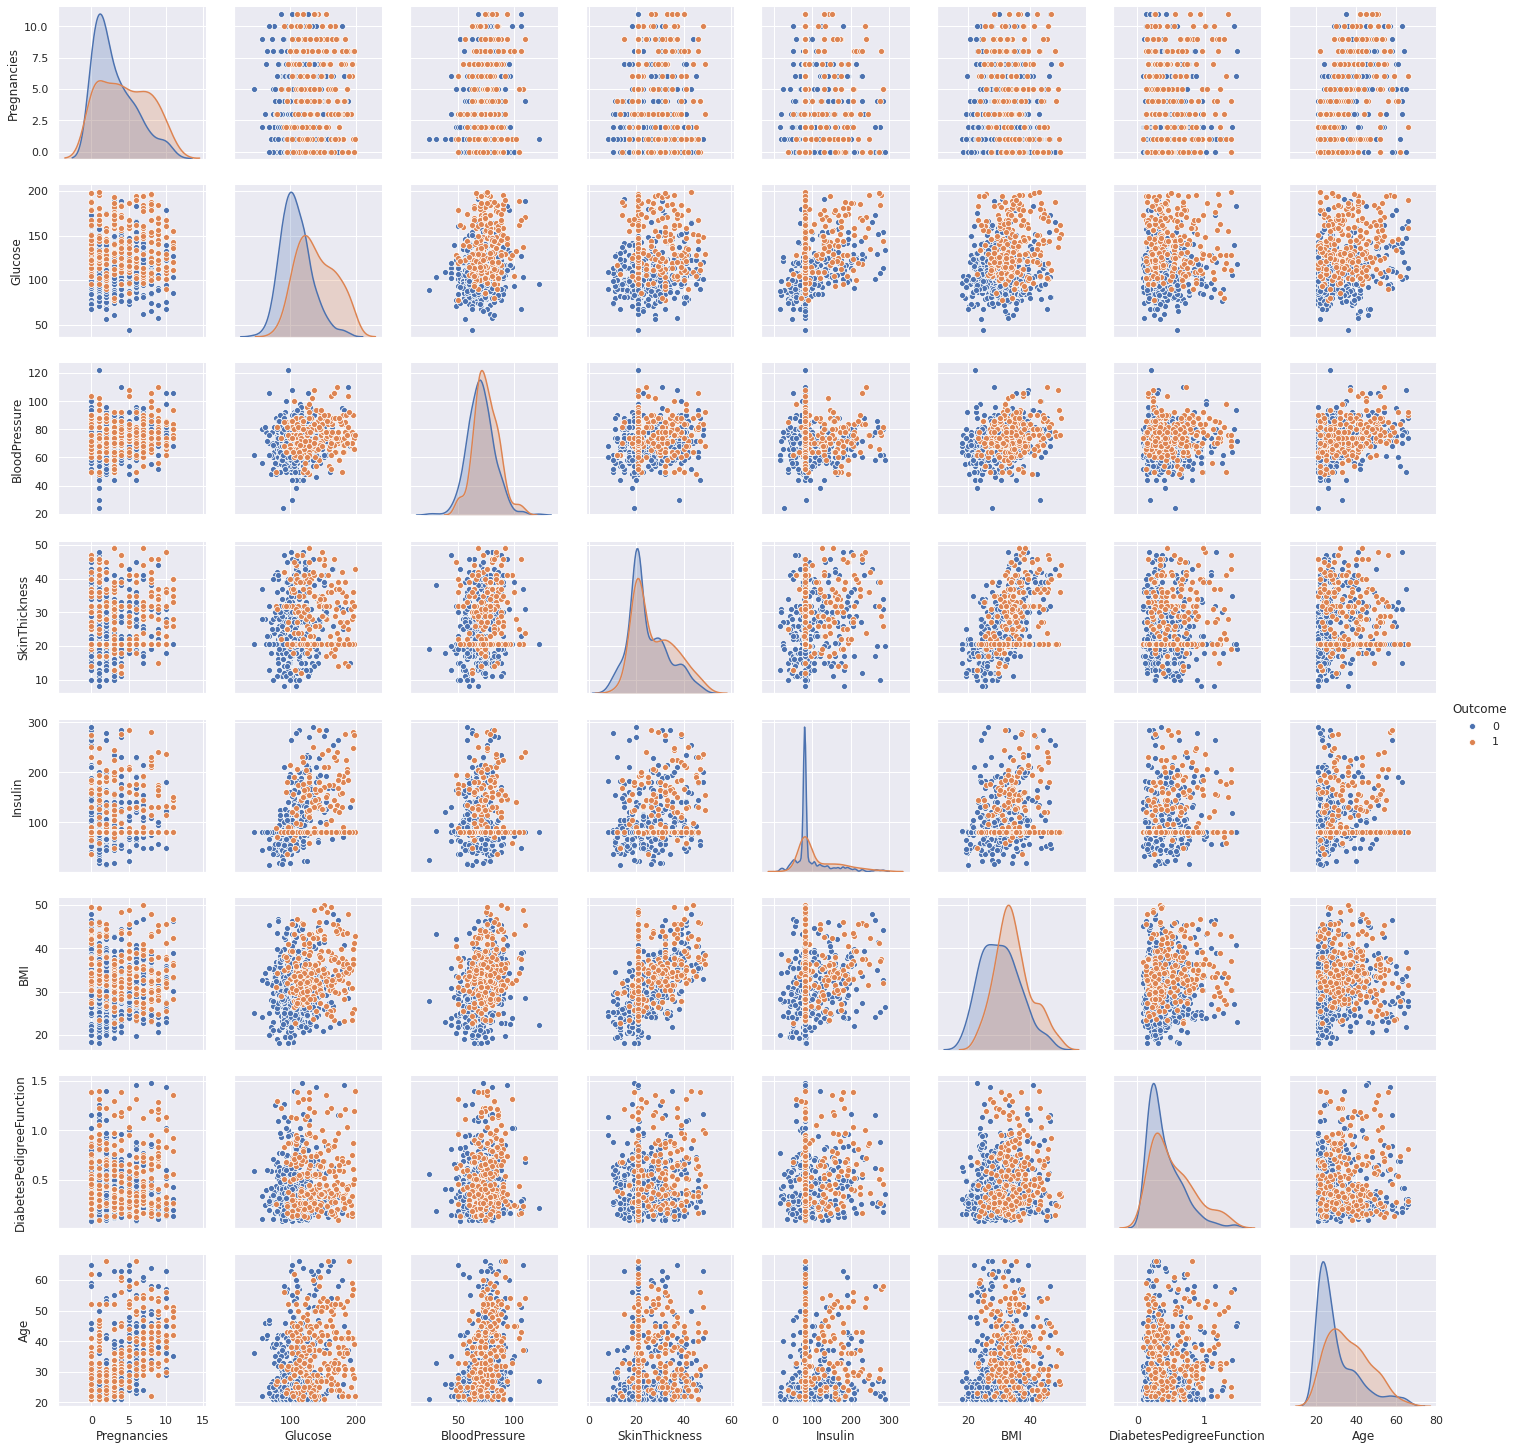

In [13]:
# Pair plot for clean data
p = sns.pairplot(data_cleaned, hue = 'Outcome')

In [14]:
#  Assigning Input and Label columns
X = data_cleaned.drop("Outcome",axis = 1)
y = data_cleaned['Outcome']

## Scaling the data 

In [15]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

#  Scaling or Standardizing of dataset 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [16]:
# Looking at the transformed data
X_scaled

array([[ 7.96753910e-01,  9.83984062e-01,  4.52611463e-04, ...,
         2.65819648e-01,  6.30484542e-01,  1.60141519e+00],
       [-8.64793539e-01, -1.16977621e+00, -5.04474494e-01, ...,
        -8.31445036e-01, -3.38078670e-01, -1.32706484e-01],
       [ 1.46137289e+00,  2.18051755e+00, -6.72783529e-01, ...,
        -1.34872696e+00,  7.88402456e-01, -4.14369227e-02],
       ...,
       [ 4.64444420e-01,  6.09439465e-02,  4.52611463e-04, ...,
        -8.94145875e-01, -7.10063091e-01, -2.23976046e-01],
       [-8.64793539e-01,  2.31877301e-01, -1.00940160e+00, ...,
        -2.82812694e-01, -3.45097244e-01,  1.32760650e+00],
       [-8.64793539e-01, -8.96282840e-01, -1.67856424e-01, ...,
        -2.35787064e-01, -4.64413001e-01, -8.62862978e-01]])

In [17]:
# Checking muti Collinearity of features
from statsmodels.stats.outliers_influence import variance_inflation_factor

#  getting VIF for Multi-collinearity

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


In [18]:
# Train-Test splitting of dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

# Fitting some popular Decision maker algorithms

## Fitting Logistic regression model

In [19]:
# Importing Logistic Regression from SK-learn
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

#  Fitting Logistic regress Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


/home/student-shriman/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Defining a function for getting the prediction
def accuracy(model):
    y_pred = model.predict(X_test)
    Accuracy = accuracy_score(y_test,y_pred)
    print ('Accuracy with', model, 'is => ', Accuracy )


In [21]:
# Fitting a Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import Image 

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy(clf)

Accuracy with DecisionTreeClassifier() is =>  0.6686390532544378


In [22]:
# Fitting a KNN classifier over dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [23]:
#  Importing Bagging classifier
from sklearn.ensemble import BaggingClassifier

# Going with Bagging knn
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5), n_estimators=10, max_samples=0.5, bootstrap=True,
                            random_state=3,oob_score=True) 

#  fitting bag_knn on Train data
bag_knn.fit(X_train, y_train)
accuracy(bag_knn)

Accuracy with BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  oob_score=True, random_state=3) is =>  0.7751479289940828


In [24]:
#  Fitting a Random Forest ClASSIFIER
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(random_state=6)  
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [25]:
# Getting Prediction for Test data with KNN classifier
accuracy(log_reg)
accuracy(knn)
accuracy(bag_knn)
accuracy(clf)
accuracy(rand_clf)

Accuracy with LogisticRegression() is =>  0.7988165680473372
Accuracy with KNeighborsClassifier(n_neighbors=11) is =>  0.7751479289940828
Accuracy with BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  oob_score=True, random_state=3) is =>  0.7751479289940828
Accuracy with DecisionTreeClassifier() is =>  0.6686390532544378
Accuracy with RandomForestClassifier(random_state=6) is =>  0.8284023668639053


> **Random Forest Classifier is giving best accuracy score, so we will use random forest Classifier.**

In [26]:
#  Hyper Parameter tuning of Random Forest

# Creating a Parameter dictionary
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

# Making a GridsearchCV function
grid_search = GridSearchCV(estimator=rand_clf, param_grid=grid_param, cv=5, n_jobs =-1, verbose = 3)

In [27]:
#  Training again the Model with Best parameters
rand_clf = RandomForestClassifier(criterion= 'entropy', max_features = 'auto',  min_samples_leaf = 1,  min_samples_split= 4,
                                  n_estimators = 115,random_state=6)
rand_clf.fit(X_train,y_train)
accuracy(rand_clf)

Accuracy with RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=115, random_state=6) is =>  0.8284023668639053


# Model Performance Analysis

## 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
<img src='https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png' width='480px'>



### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

<img src='https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg' width='620px'>


In [28]:
# Confusion Matrix
y_pred = rand_clf.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[106,  11],
       [ 18,  34]])

In [29]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [30]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8284023668639053

In [31]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.905982905982906

In [32]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8548387096774194

In [33]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8796680497925311

In [34]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7799145299145299

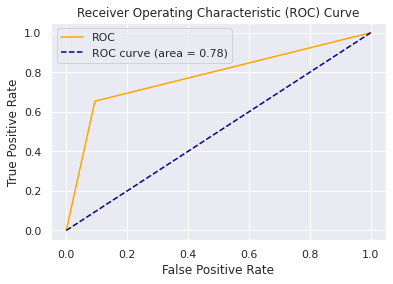

In [35]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#  Saving the trained Random Forest model

In [38]:
#  saving the Trained model into pickle
import pickle
# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(rand_clf,f)
    
with open('sandardScalar.pkl', 'wb') as f:
    pickle.dump(scalar,f)